---
title: "analytcis model"
format: html
jupyter: python3
execute:
  echo: true
  warning: false
  error: true
toc: true
code-fold: true
---

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score
eda = pd.read_csv("data/eda_data.csv")


In [3]:

eda = pd.read_csv("data/eda_data.csv")

features = eda[['SALARY', 'MAX_YEARS_EXPERIENCE', 'MIN_YEARS_EXPERIENCE']].copy()

for col in ['MAX_YEARS_EXPERIENCE', 'MIN_YEARS_EXPERIENCE', 'SALARY']:
    features[col] = pd.to_numeric(features[col], errors='coerce')

features = features.dropna()

scaler = StandardScaler()
X = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=688)
eda.loc[features.index, 'Cluster'] = kmeans.fit_predict(X)

true_labels = eda.loc[features.index, 'SOC_2021_4_NAME']
true_labels_encoded = LabelEncoder().fit_transform(true_labels)

ari = adjusted_rand_score(true_labels_encoded, eda.loc[features.index, 'Cluster'])

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML

# 1) Build the DataFrame
df_plot = features.copy()
df_plot['Cluster'] = eda.loc[features.index, 'Cluster']

# 2) Compute centroids in original units
centroids = kmeans.cluster_centers_
centroids_x = centroids[:, 0] * X.std(axis=0)[0] + X.mean(axis=0)[0]
centroids_y = centroids[:, 1] * X.std(axis=0)[1] + X.mean(axis=0)[1]

# 3) Create an interactive Plotly Figure
fig = px.scatter(
    df_plot,
    x='SALARY',
    y='MAX_YEARS_EXPERIENCE',
    color='Cluster',
    title="KMeans Clustering by Salary and Max Years Experience",
    labels={
        'SALARY': 'Salary',
        'MAX_YEARS_EXPERIENCE': 'Max Years Experience',
        'Cluster': 'Cluster'
    },
    width=800,
    height=500,
)

# 4) Add centroid traces
fig.add_trace(
    go.Scatter(
        x=centroids_x,
        y=centroids_y,
        mode='markers',
        marker=dict(symbol='x', size=18, color='black', line=dict(width=2, color='white')),
        name='Centroids'
    )
)


Here we have 4 cluster groups. Group 0, which represent as green have lower salary, mostly under 150k, and max years experience in 2-5 years, it is likely Likely junior to mid-level employees with moderate pay. Group 1 with orange, has medium to high salary, wide range from $100k–$500k and with narrow range ~3 years, they are suggests specialized or high-paying roles with short experience — possibly fast-track promotions or high-demand fields. cluster 2 are low salary and experience from 0-4 years, they are clearly entry level employee. cluster 3 has medium salary, mostly under 200k with higher experiences, like 6-13 eyars. They probably are senior professionals with more experience but not the highest salaries. 


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features1 = eda[['MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE']].copy()

for col in features.columns:
    features[col] = pd.to_numeric(features[col], errors='coerce')

features = features.dropna()

X = features
y = eda.loc[X.index, 'SALARY']

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=688)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



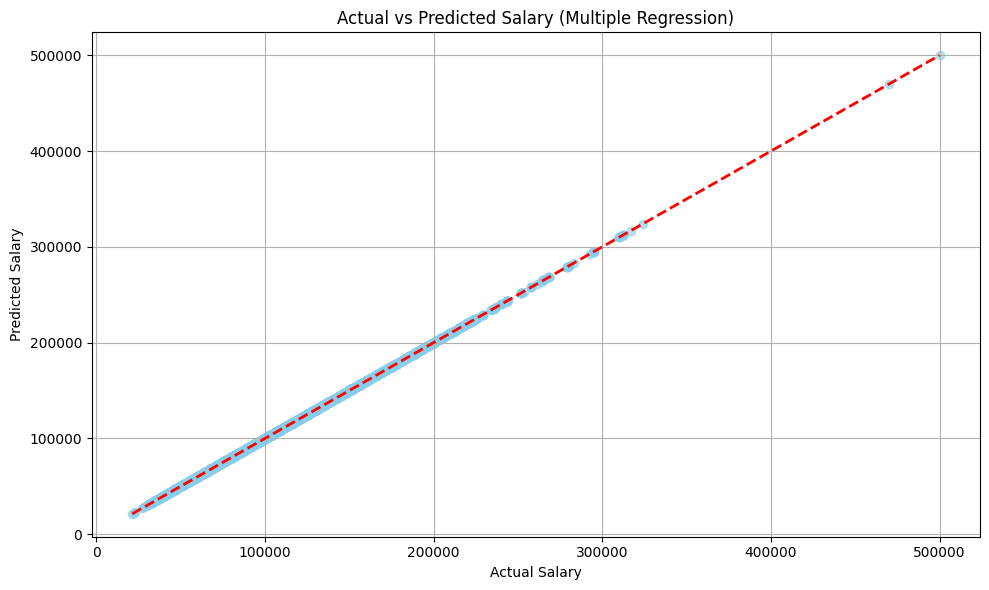

In [26]:
plt.figure(figsize =(10,6))
plt.scatter(y_test, y_pred, alpha = 0.6, color = 'skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Multiple Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows the Actual vs. Predicted Salary using a multiple linear regression model. The blue dots represent individual predictions, and the red dashed line is the ideal line where predicted = actual. Since most points lie very close to the red line, it means your model predicts salary very accurately, with minimal error and strong linear fit — likely reflected in a high R² score near 1.0.